# Housing Price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.867787
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,9.589818
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,17.800000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.750000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [6]:
housing['CHAS'].value_counts()

0.000    417
1.000     35
0.693      8
0.740      7
0.671      6
0.700      6
0.679      6
0.597      5
0.614      4
0.668      2
0.659      2
0.718      2
0.584      2
0.580      2
0.631      1
0.713      1
Name: CHAS, dtype: int64

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

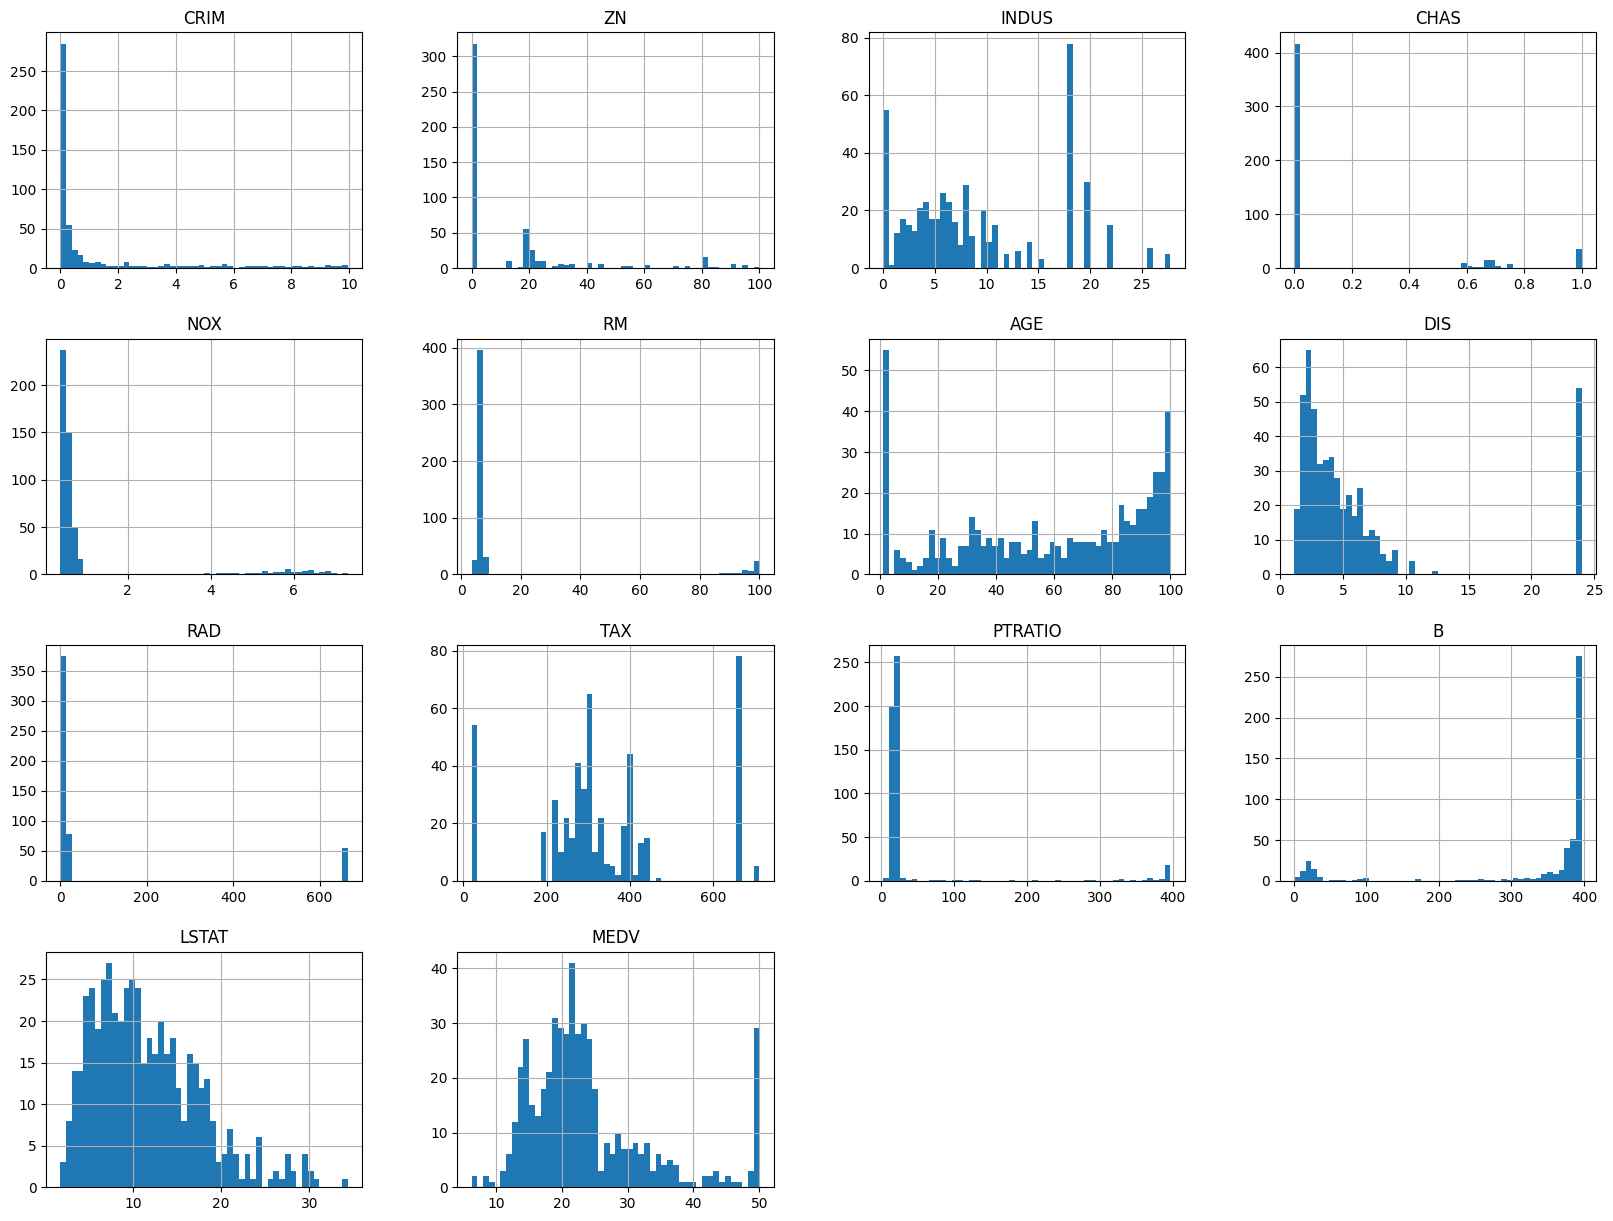

In [7]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))

# Traing test spliting

In [8]:
# for learning pro
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42) # for fixing suffled values
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
#train_set, test_set = split_train_test(housing, 0.2)

In [10]:
#print(len(test_set))

In [11]:
#print(len(train_set))

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print (f" Rows in tarin test: {len(train_set)}\n Rows in test_set: {len(test_set)}\n")

 Rows in tarin test: 404
 Rows in test_set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['RAD']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['RAD'].value_counts()

5      23
4      22
24     16
666    11
3       8
2       5
8       5
6       5
1       4
7       3
Name: RAD, dtype: int64

In [15]:
strat_train_set['RAD'].value_counts()

5      92
4      88
24     62
666    43
3      30
6      21
8      19
2      19
1      16
7      14
Name: RAD, dtype: int64

In [16]:
#housing.strat_train_set.copy()

# Looking for the Correlations

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
ZN         0.289622
CHAS       0.130741
B          0.090184
PTRATIO    0.086417
DIS        0.070500
RM         0.047644
RAD        0.028790
NOX       -0.006742
AGE       -0.230532
CRIM      -0.250760
TAX       -0.259319
INDUS     -0.336085
LSTAT     -0.631184
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

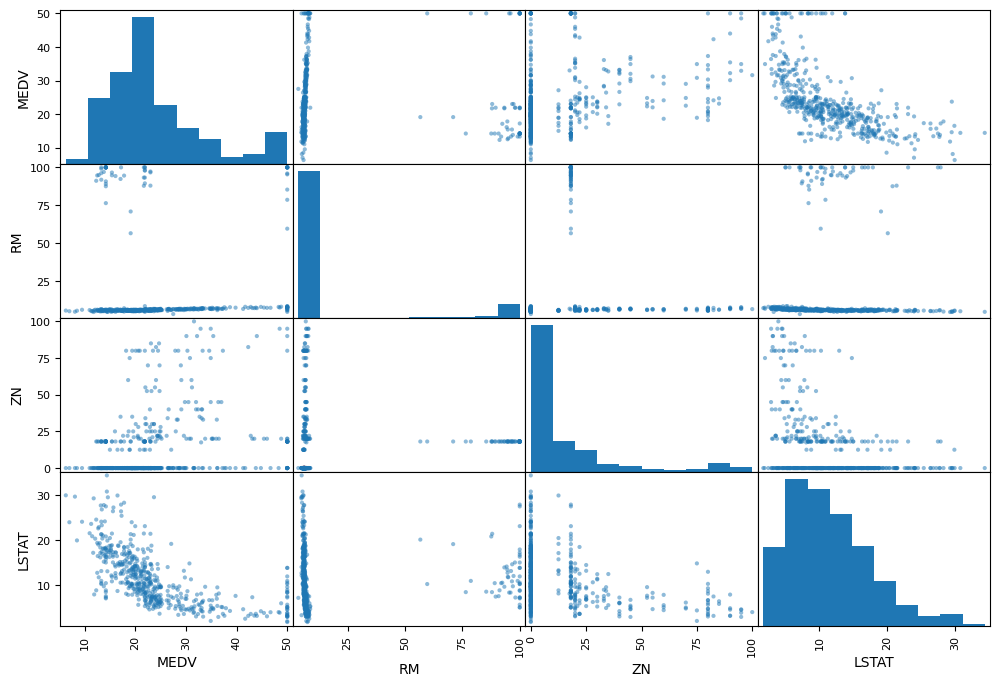

In [18]:
from pandas.plotting import scatter_matrix
attrs = ["MEDV","RM","ZN", "LSTAT"]
scatter_matrix(housing[attrs], figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

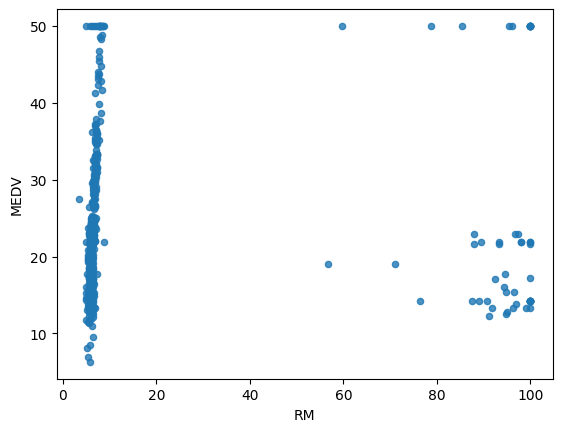

In [19]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

# Trying out attrs Combinations

In [20]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [21]:
housing["TAXRM"]

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,31.061984


# looking for corealtaion matrix

In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
ZN         0.289622
CHAS       0.130741
B          0.090184
PTRATIO    0.086417
DIS        0.070500
RM         0.047644
RAD        0.028790
NOX       -0.006742
AGE       -0.230532
CRIM      -0.250760
TAX       -0.259319
TAXRM     -0.330545
INDUS     -0.336085
LSTAT     -0.631184
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

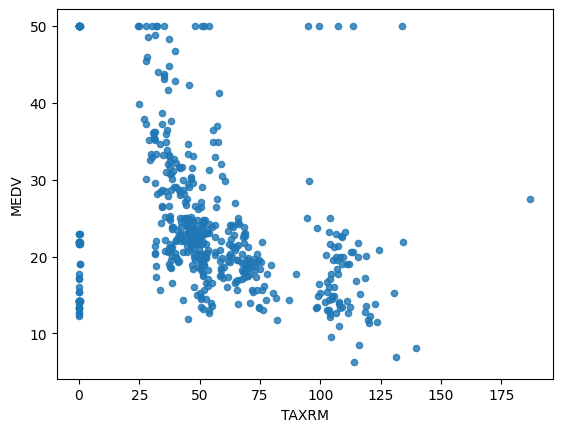

In [24]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [25]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing attrs and cleaning data

In [26]:
a = housing.dropna(subset=["RM"]) # option one
a.shape

(404, 13)

In [27]:
housing.drop("RM", axis=1).shape # option two
#note there is no RM cols also note that te orginal housing dataframe will remain unchanged

(404, 12)

In [28]:
median = housing['RM'].median() # compute median for option three
median

6.318

In [29]:
housing ['RM'].fillna(median) # option three
# Note that the orginal data frame will remain unchanged

49       5.602
232      8.337
331      5.706
407    100.000
238      6.481
        ...   
485      6.312
412    100.000
360      6.398
418    100.000
134      5.757
Name: RM, Length: 404, dtype: float64

In [30]:
housing.shape

(404, 13)

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
# imputung the value perment in housing

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([1.43430e-01, 0.00000e+00, 7.22500e+00, 0.00000e+00, 5.38000e-01,
       6.31800e+00, 6.57500e+01, 3.79720e+00, 5.00000e+00, 3.07000e+02,
       1.87000e+01, 3.90815e+02, 1.03300e+01])

In [33]:
X = imputer.transform(housing)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [35]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1.248999,13.041584,9.305619,0.143589,1.100398,15.701683,58.561284,6.081826,77.866337,341.253960,43.269059,331.737871,11.543713
std,2.347777,23.064183,7.217313,0.316358,1.646272,27.276791,33.423188,6.472001,203.357847,181.294973,88.677568,126.154466,6.097919
min,0.000000,0.000000,0.000000,0.000000,0.385000,4.903000,1.137000,1.129600,1.000000,20.200000,7.680000,0.320000,1.730000
25%,0.050125,0.000000,3.440000,0.000000,0.449000,5.960750,30.650000,2.424925,4.000000,254.000000,16.900000,361.737500,6.915000
50%,0.143430,0.000000,7.225000,0.000000,0.538000,6.318000,65.750000,3.797200,5.000000,307.000000,18.700000,390.815000,10.330000
75%,0.859343,18.100000,18.100000,0.000000,0.647000,6.961500,90.000000,6.219600,24.000000,403.000000,20.200000,395.690000,14.990000
max,9.966540,100.000000,27.740000,1.000000,6.968000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000


## Scikit-learn Desigin

# Features Scaling

## Create the pipline to solve the pipline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    # .... add as many as you want
    ('std_scaler', StandardScaler()),
])

In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr
# this is the numppy array
# we will use predictor in future which will use numpy array as input

array([[-0.43892807, -0.5661486 , -0.33233826, ..., -0.28643676,
         0.51716699,  0.76453306],
       [-0.28731195, -0.5661486 , -0.4308348 , ..., -0.29208216,
         0.42994354, -1.48984659],
       [-0.5112306 ,  0.95323744, -0.45025665, ..., -0.29772755,
         0.49430952,  0.14552277],
       ...,
       [ 1.40430888, -0.5661486 ,  1.2200227 , ..., -0.26046794,
         0.33986292, -0.61633605],
       [-0.53265183,  0.21959104, -1.29094543, ..., -0.30280841,
        -2.469224  , -0.4505004 ],
       [-0.11635147, -0.5661486 ,  1.74580001, ..., -0.24917715,
        -0.54745108,  0.94678808]])

In [39]:
housing_num_tr.shape

(404, 13)

# Select the desired model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model = LinearRegression()
#model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [41]:
 some_data =  housing.iloc[:5]

In [42]:
some_labels = housing_labels.iloc[:5]

In [43]:
prepred_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepred_data)

array([19.31 , 43.328, 17.728, 18.907, 23.935])

In [45]:
list(some_labels)

[19.4, 41.7, 17.1, 17.2, 23.7]

# Evaluting the models

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)


In [47]:
rmse

1.8768757290974933

## using better Evalualtion tech  - Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [49]:
rmse_scores

array([3.87789798, 4.75898262, 4.13157374, 6.10994973, 5.4646931 ,
       4.23574539, 4.62001688, 6.85549687, 5.72847985, 6.24853968])

In [50]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Stander Devations:", scores.std())

In [51]:
print_scores(rmse_scores)

Scores: [3.87789798 4.75898262 4.13157374 6.10994973 5.4646931  4.23574539
 4.62001688 6.85549687 5.72847985 6.24853968]
Mean: 5.203137583944505
Stander Devations: 0.9678595422476061


## Saving the model

In [54]:
from joblib import dump, load
dump(model, 'raju.joblib')

['raju.joblib']

## Testing the models on test data

In [57]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy
X_test_prepred = my_pipeline.transform(X_test)
final_predctions = model.predict(X_test_prepred)
final_mse = mean_squared_error(Y_test, final_predctions)
final_rmse = np.sqrt(final_mse)

TypeError: Expected sequence or array-like, got <class 'method'>

In [58]:
final_rmse

NameError: name 'final_rmse' is not defined